**IMPORTANT** <br> <ul> <li> Do **NOT** replace or remove this notebook (ipynb file)! Each cell has unique nbgrader's metadata and ID which, if changed outside the nbgrader, cannot pass the tests. Do **NOT** change the name of the file!</li> <li> To receive any credit, don't forget to **SUBMIT** your notebook when you are done! You can have multiple submissions before the deadline; only the last one is saved, including its timestamp.</li> <li>Before submitting, **Validate** your notebook to check if your codes pass all visible tests. </li> <li>Make sure you fill in any cell with the comment `# your code here`. Remove or comment the command `fail()` (in R), or `raise NotImplementedError` (in Python) and place your code there </li> </ul>

In [1]:
NAME = "Madison Chester"

---

Reference: 

- Tensorflow/Keras tutorial: https://www.tensorflow.org/tutorials/keras

- *Deep Learning with Python*, Francois Chollet

In [2]:
## RUN THIS CELL FIRST to import TensorFlow and some helper modules

# TensorFlow and tf.keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import layers

# the usual suspects
import numpy as np
import matplotlib.pyplot as plt

## Problem 1.

<br> <br>

In this problem we use fashion MNIST dataset discussed in class. Recall there are 60,000 training images and 10,000 test images of 10 different cloth items. Each image is of (low) resolution of 28x28 pixels, on a gray scale from 0 to 255.  

<img src="fashion-mnist-collection.png" width="500">


In [3]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


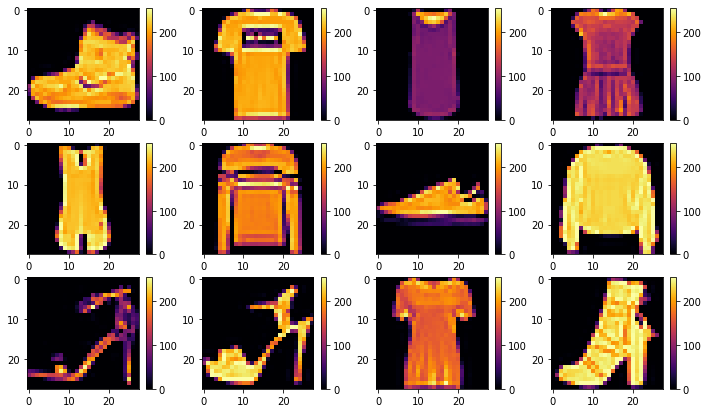

In [4]:
plt.figure(figsize=(12,7))  #create new figure object and set its size
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    plt.imshow(train_images[i],cmap='inferno') #colormap inferno: black to red to yellow
    plt.colorbar()
    
plt.show()

* The `train_images` and `train_labels` are `numpy` arrays; together, they make the training dataset.

* Similarly, `test_images`, and `test_labels` are `numpy` arrays that make our test dataset, used for testing the performance of our neural net. 

So, the train-test split was already done for us, although we could combine these data and make our own split.

The images are 28x28 `numpy` arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

We create `class_names` list with names of the 10 classes, to be used later.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the Data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
#how many images
print('number of images:',len(train_images))

#of what type is the 1st image (i.e. all images)
print('type:', type(train_images[0]))

#of what shape is the 1st image (i.e. all images)
print('shape:', train_images[0].shape)

#what are minimum and maximum values in the entire train_images
print('image value range:', (np.min(train_images), np.max(train_images)))

number of images: 60000
type: <class 'numpy.ndarray'>
shape: (28, 28)
image value range: (0, 255)


Also, there are 60,000 labels in the training set:

In [7]:
print('number of labels:', len(train_labels))
print('type:',type(train_images))
print('shape:', train_labels.shape)
print('set of label values:', set(train_labels))

number of labels: 60000
type: <class 'numpy.ndarray'>
shape: (60000,)
set of label values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


We see each label is an integer between 0 and 9 (representing 10 different fashion articles).

Similarly to training data, there are 10,000 images and labels in the test set. Again, each test image is represented as 28 x 28 pixels, and each test label has value 0-9.

In [8]:
print('test_images shape:', test_images.shape)
print('image value range:', (np.min(test_images), np.max(test_images)))

print('\ntest_labels shape:', test_labels.shape) # \n is for new line
print('set of label values', set(test_labels))

test_images shape: (10000, 28, 28)
image value range: (0, 255)

test_labels shape: (10000,)
set of label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## Preprocessing the Data

The data must be preprocessed before training the network. We saw  the range of pixel values goes from 0 to 255. 

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [9]:
train_images = train_images / 255
test_images = test_images / 255

To verify that everything is okay after this transformation, we plot first 12 images from the training set and display the class name below each image.

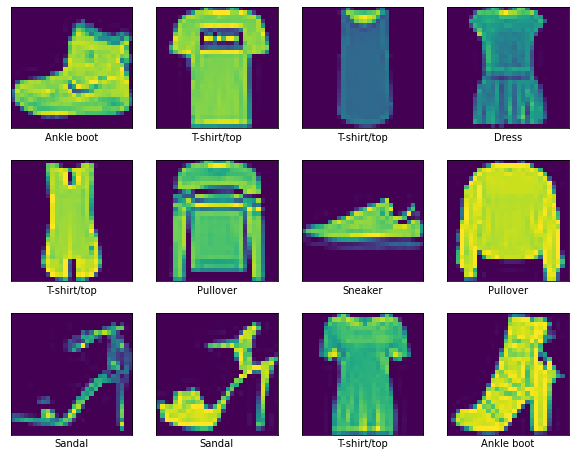

In [10]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='viridis') #colormap viridis: darkblue to green to yellow
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

We could also use a grey scale (binary; or binary in reverse order):

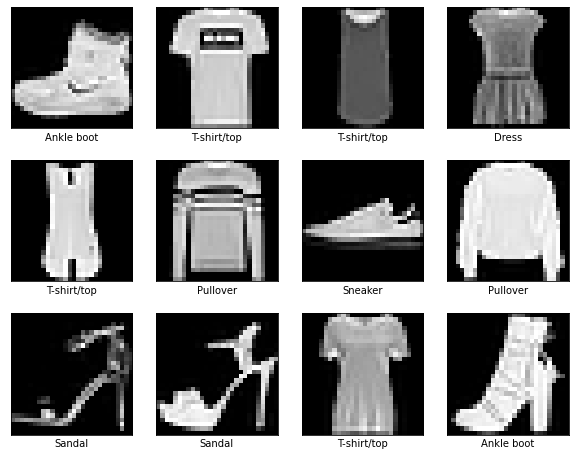

In [11]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary_r) #colormap: binary reversed
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

## Building the Model

Building a neural network requires configuring the layers of the model and then compiling the model. Before that, we set the `numpy` and `tensorflow` seeds so that when re-runing the cell we start with the same initial values of all the parameters to be learned/estimated (this gives us reproducibility of the same results).

In [12]:
np.random.seed(123) #set the seed in numpy
tf.random.set_seed(1234)  #set the seed in tensorflow

#building the architecture of the model
mynet = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28), name='input_layer'), #reshaping image to vector (flattening)
    layers.Dense(units=128, activation='relu', name='hidden1'),
    layers.Dense(units=10, activation='softmax', name='output_layer')
], name='mynet') #name is used in printout (can be different from 'mynet')

#compiling the model
mynet.compile(optimizer='rmsprop', #root mean square propagation optimizer
              loss='sparse_categorical_crossentropy', #measures model performance/accuracy
              metrics=['accuracy']) 


mynet.summary()

Model: "mynet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Remarks:**

<ul>
<li>
    The first layer in our neural net (created by <code>tf.keras.layers.Flatten()</code>) reformats the images from a two-dimensional array (28 by 28 pixels) to a one-dimensional array (28 * 28 = 784 pixels). This is just unstacking rows of pixels in the image and lining them up into a single vector - some sort of "flattening". Since this layer only reformats the data, it has no parameters to estimate/learn. 
    </li>
<br>
<li>
    The other two layers (<code>hidden1</code> and <code>output_layer</code>) have similar syntax as R version of Keras; they are "dense" in the sense that every nod is connected to any other in previous and the following layer. Note that we put 128 units (i.e. nodes) in the first of these two layers and relu as an activation function. Also, since the output variable has 10 catigories, we set units=10, and use softmax as an activation function to get estimates of probabilities for each of the 10 categories of our output variable.
    </li>
<br>
<li>
    In the compiling step, we chose <code>rmsprop</code> (root mean square propagation) optimizer. One can also try, say, <code>adam</code> (adaptive moment estimation).  <br>
Also, as a measure of performance (loss function), we chose <code>loss=sparse_categorical_entropy</code>. The function behind this value of <code>loss</code> argument is the same as for <code>categorical_entropy</code>, which is

$$-{1\over N} \sum_{i=1}^N\sum_{j=0}^{9}1_{\{y_i=j\}}\ln\hat{\pi}_j(x_i)$$

The difference between `loss=categorical_entropy` and `loss=sparse_categorical_entropy` is in the format of $y_i$'s that you use for your categorical output $Y$. If $y_i$'s are one-hot encoded (eg. for 3-class classifification: [1,0,0], [0,1,0], [0,0,1]), then we should use `categorical_entropy`. However, when $y_i$'s are integers (like in our case 0,1,...,9), we should use `sparse_categorical_entropy`. <br>
As per <code>metrics</code>, we use `accuracy`, i.e. the proportion of correctly classified images.
    </li>
</ul>

- Names of layers and the sequential model are not required. Also, they cannot include space in the string.
<br>

- As you can see from previous cell, we called our model `mynet`. The `summary()` method of `mynet` prints out parameters to be estimated in each layer. Note that in the first dense layer we have 1040. This is because we have 128 nodes in this layer, connected with 10 nodes in the flatten layer. So, the $j$-th node has $z_j$ input given by $z_j=b_j+\sum_{i=1}^{784}w_{ij}x_i$, which means 785 parameters to estimate. Since $j=1,2,...,128$, we have $785 \cdot 128 = 100480$ parameters in the first dense layer to be estimated. In the second dense layer, we have $(128 + 1) \cdot 10 = 1290$ parameters to be estimated. So, in total, there are  $100480+1290=101770$ parameters in the `mynet` model to be estimated/trained.

### Training/Fitting the Model

For fitting the model, we use [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method of our object `mynet`.

In [13]:
#fit the mynet model
mynet.fit(x=train_images, y=train_labels, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6578 - accuracy: 0.7737
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.8419
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8587
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8683
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3441 - accuracy: 0.8754


We can see the value of the loss function (categorical cross-entropy), as well as the accuracy (proportion of correctly predicted trained samples) after each epoch. As the model gets trained, they are getting better - the value of the loss function decreases, the accuracy increases. However, in general, this doesn't necessarily have to be in monotonic order (decreassing loss and increasing accuracy). It may be very hard to fine-tune various hyperparameters (such as optimizer, learning rate, batch size, etc.) so that you get (at least in overall) an improvement as the learning process goes. Keras tries to optimize some hyperparameters that you don't specify and which don't have default values. In addition, we only ran 5 epoch (for the sake of time bravity). If we continue and run a lot of epochs, the rate of improvement eventually slows down and the model reaches its best possible performance; in general, it can even get worse if we keep going (depending on how well hyperparameters were tuned).

Note that we chose the batch size, i.e. the number of samples to propagate through the neural net in each iteration, to be `batch_size=256`. Since there are $60,000$ training obs, each epoch consists of $\lceil 60,000/256\rceil=\lceil 234.375\rceil=235$ iterations (here, $\lceil ... \rceil$ means rounding up, ceiling).

**IMPORTANT!** If you rerun the `mynet.fit()` function, the initial values of the parameters will be different, resulting in the rerun having different otput (i.e. different estimated/learned values of the network parameters) from those in the first run. In order to reproduce the same results, first you need to run the cell that sets the `numpy` and `tensorflow` seeds and re-builds `mynet` object.

### Evaluating Performance

Next, we compare how the model performs on the test dataset:

In [14]:
test_loss, test_acc = mynet.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 0s - loss: 0.4044 - accuracy: 0.8515 - 319ms/epoch - 1ms/step

Test accuracy: 0.8514999747276306


### Predictions

We can use our model `mynet` to make predictions about some images.


In [15]:
predictions = mynet.predict(test_images)

print(predictions)

print('\nshape of predictions ndarray:', predictions.shape)  # \n is for new line

[[2.9904184e-06 2.3918841e-07 1.2490528e-06 ... 1.4906596e-02
  2.0891067e-03 9.4707835e-01]
 [1.4323782e-04 1.3284203e-07 9.8944396e-01 ... 3.3503887e-11
  1.0092817e-05 3.4112799e-11]
 [1.2480241e-05 9.9997973e-01 1.2433944e-07 ... 1.3486366e-11
  4.5919526e-09 1.1816198e-11]
 ...
 [2.3308161e-03 5.4548747e-07 3.7078222e-04 ... 1.2800583e-05
  9.7215760e-01 8.7782718e-07]
 [5.3987441e-07 9.9958163e-01 2.1607468e-07 ... 6.2875407e-09
  2.2887017e-08 1.0963821e-07]
 [4.0604049e-05 3.8928897e-06 1.3066124e-04 ... 2.7134176e-02
  5.5002938e-03 6.6485134e-04]]

shape of predictions ndarray: (10000, 10)


We see the numpy array `predictions` is of shape 10,000 x 10. There are 10,000 test images, and thus, 10,000 rows of `predictions`. For each test image, we have a sequence of 10 probabilities, one for each of the labels 0,1,...,9. This is because we chose the output layer to have 10 nodes/units and `softmax` as activation function.

Here below is the probability sequence for the first image (index=0). We also check that they sum up to 1 (which, of course, due to round-off errors may not be exactly 1, but close to it).

In [16]:
print(predictions[0])


from IPython.display import display, Math   #import display & Math to print latex syntax
display(Math(r'\sum_{j=0}^9 \pi^{(0)}_j = ' + str(np.sum(predictions[0]))))


[2.9904184e-06 2.3918841e-07 1.2490528e-06 2.4134790e-06 1.5514147e-06
 3.5908516e-02 8.9596915e-06 1.4906596e-02 2.0891067e-03 9.4707835e-01]


<IPython.core.display.Math object>

The largest value is the last one (label = 9) and is equal to $\pi^{(0)}_9 = 9.4707835\cdot 10^{-1} = 0.94707835$. The estimates of probabilities of all the rest of the labels are very low. So, our model seems to be pretty confident that it is label 9, i.e. Ankle Boot. 

Here below we use `np.argmax()` to find the index of the largest probability automatically (which we know is 9), and print out the label name.

In [17]:
#find index of the largest probability for the 1st image
print(np.argmax(predictions[0]))

#print the name of the corresponding category/label 
print(class_names[np.argmax(predictions[0])])

9
Ankle boot


Is our model correct?

In [18]:
test_labels[0]

9

YEESSSS!!! &#128515; 

<br>

We can make a nice graph to look at the full set of 10 class predictions for the 1st image. To do that, we create two functions, plot_image() and plot_value_array(). The code in the following cell was taken from TensorFlow/Keras tutorial and slightly modified.



In [19]:
#taken from https://www.tensorflow.org/tutorials/keras/classification

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = (0,0.6,0)
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color=(0.7,0.7,0.7))  #paint all bars in gray
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red') #over-paint the predicted (i.e. tallest) bar in red
    thisplot[true_label].set_color((0,0.8,0)) #over-paint the bar for the true label in green 

If you take a closer look at the functin `plot_value_array()` you will see that it plots a bar chart in the following way. First, it plots bars for each label/category, of height equal to the corresponding estimated probability. These bars are plotted in gray color. Then, it over-paints the predicted label (which is the tallest bar) in red. Then, it overpaints the bar for the true label in green.

Consequently, if our predicted label is correct, we will only see one green (which is also the tallest one) and the rest are gray bars. If, however, our model incorrectly predicted the label, the tallest bar (our prediction) will be in red, the green one is correct (i.e. the true label), and the rest are gray. By the way, if a probability is negligible (very small), the corresponding bar will not be ploted.

So, let's see the plot for the first test image (index=0).

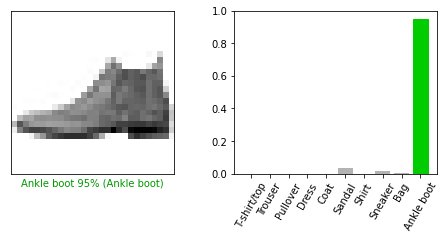

In [20]:

i = 0  #first image

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=60)
plt.yticks(0.2*np.arange(6))
plt.show()

That's nice!

However, as we saw earlier, the model accuracy on the test data is $\approx 85\%$ (after 5 epochs). Here below we see how our model incorrectly predicted the 13th item in the test data (index=12). 

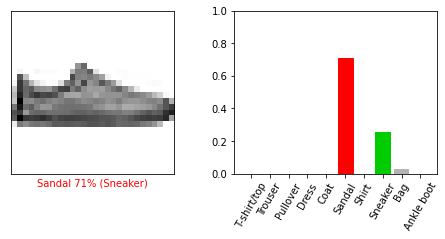

In [21]:
i = 12
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=60)
plt.yticks(0.2*np.arange(6))
plt.show()

As mentioned above, the red one is our predicted fashion item (Sandal), while the correct one is green (Sneaker). 

In the previous plot (for the 1st image), the predicted bar was first re-painted from gray to red, and then the correct bar (i.e. our predicted bar) was repainted from red to green.

Now, let's plot 12 selected images with their predictions. Note that the model can be wrong even when very confident (like for the upper-left and upper-right items in the following plot).


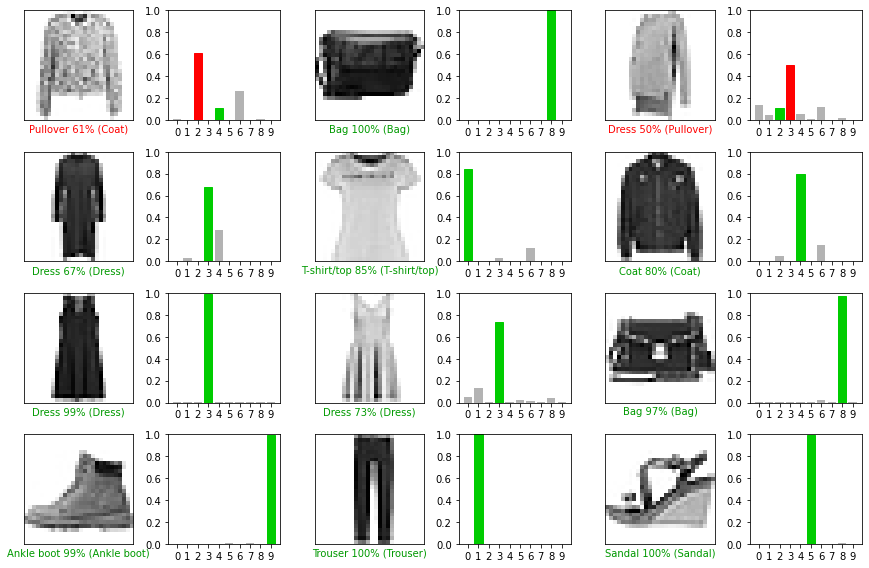

In [22]:
#list of indices of 12 selected images to plot
li = [51, 56, 66, 67, 71, 79, 86, 91, 95, 203, 214, 221] 

num_rows, num_cols = 4, 3    #want to make 4 by 3 subplots
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(len(li)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(li[i], predictions[li[i]], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(li[i], predictions[li[i]], test_labels)
    plt.yticks(0.2*np.arange(6))
plt.tight_layout()
plt.show()

### Predict on a Single Image

<br>

Instead of predicting for all the test images, we can also use `predict()` method to predict the type of the fashion item for just one image (or any collection of images). But, we would first need a reformating step.

Using the following code, note that the shape of the `train_images` is 60,000 x 28 x 28 and compare that to the shape of a single (i.e. the first training) image, which is 28 x 28. 

In [23]:
print(train_images.shape)

img = train_images[0]
print(img.shape)


(60000, 28, 28)
(28, 28)


To make our first image usable in the `predict()` function, we reformat it by adding extra dimension (the first dimension, i.e. axis=0)

In [24]:
img = np.expand_dims(img,axis=0)

img.shape

(1, 28, 28)

Now we can apply `predict`.

In [25]:
probs = mynet.predict(img)

print(probs)

print('\npredicted label:',np.argmax(probs),'; fashion item:',class_names[np.argmax(probs)])

[[4.5843032e-10 1.2998079e-10 1.1479474e-10 4.2543222e-09 7.0085812e-11
  3.6467685e-04 1.6064334e-09 3.1987336e-04 2.7024471e-06 9.9931276e-01]]

predicted label: 9 ; fashion item: Ankle boot



Now it's your turn.

<br> 

### Part (a)

Build a neural net called `mynet`using `tf.keras.Sequential()` method. 

- Use `layers.Flatten()` to create first layer which just reformats the images appropriately. Name this layer 'input_layer'.

- Add to that a dense layer with 128 nodes/units and 'relu' as activation function. Name this layer 'hidden1'

- Add to that a dense layer with 512 nodes and 'tanh' as activation function. Name this layer 'hidden2' 

- Finally, add a dense layer with appropriate number of nodes/units and activation function, so that it represents the output layer with 10 estimated probabilities, one for each label. Name this layer 'output_layer' 

<br>

**IMPORTANT** 

- The following answer cell starts with setting the `numpy` and `tensorflow` seeds:

`np.random.seed(123)`

`tf.random.set_seed(1234)`

Do **NOT** remove these lines. This will enable reproducibility of the same results each time you run these cells and fit the model, which is necessary for you to get the expected answers.

- Although we said layers' names are not required, the following tests will call the layers by the above names. So, you do need to include the desired names in order for `mynet` to pass the tests.



In [28]:
np.random.seed(123) #set the seed in numpy (do NOT remove this)
tf.random.set_seed(1234)  #set the seed in tensorflow (do NOT remove this)

mynet = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28), name='input_layer'),
    layers.Dense(units=128, activation='relu', name='hidden1'),
    layers.Dense(units=512, activation='tanh', name='hidden2'),
    layers.Dense(units=10, activation='softmax', name='output_layer')
], name='mynet') 

In [29]:
#check whether there are 4 layers (including the input layer)
assert len(mynet.layers) == 4 , "Sorry, wrong answer"

#check whether hidden2 layer has 512 nodes
assert mynet.get_layer('hidden2').output_shape == (None, 512), "Sorry, wrong answer"

In [30]:
#check whether there are 128 by 512 weights in hidden2 laywer
mynet.get_layer('hidden2').get_weights()[0].shape == (128,512)

#check whether there are 512 weights in hidden2 laywer
mynet.get_layer('hidden2').get_weights()[1].shape == (512,) 

True

In [31]:
#check whether norm of vector of initial weights of the 1st node/unit in hidden2 are correct
assert abs(np.linalg.norm(mynet.get_layer('hidden2').get_weights()[0][:,0],ord=2) - 0.61390895) < 1.e-6

#check whether initial bias of the 1st node/unit in hidden2 is correct
abs(mynet.get_layer('hidden2').get_weights()[1][0] - 0) < 1.e-6

True

In [32]:
#check whether the answer is correct (hidden tests)



<br>

### Part (b)

<br>

Compile the `mynet` neural net by setting adaptive moment (`adam`) as an optimizer; use `sparse_categorical_crossentropy` as a loss function, and `accuracy` as a measure of performance.

In [33]:
mynet.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
#check whether the loss function in mynet is sparse_categorical_crossentropy

assert mynet.loss == 'sparse_categorical_crossentropy'

In [35]:
#check whether the 2nd and 3rd decimal digits of learning rate for the optimizer are 01
from keras import backend
assert np.mod(np.floor(backend.get_value(mynet.optimizer.learning_rate) * 10**3), 100) == 1

In [36]:
#check whether the learning rate is correct (hidden tests)



<br>

### Part (c)

<br>

Fit/train the neural net `mynet` using `train_images` and `train_labels` as training data. Use **10 epochs**. Set the **batch size to be 500**.

If everything is correct, the accuracy after the 1st epoch should be 0.7871, and after the 10th epoch it should be 0.9055.
<br>

**Important:** As mentioned earlier, if you want to rerun your code for fitting the model, you should first run the codes for configuring and compiling `mynet` neural net which start by first setting the seed to reproduce the expected results.  

In [37]:
mynet.fit(x=train_images, y=train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 1s 4ms/step - loss: 0.6109 - accuracy: 0.7871
Epoch 2/10
120/120 [==============================] - 0s 4ms/step - loss: 0.4044 - accuracy: 0.8537
Epoch 3/10
120/120 [==============================] - 0s 4ms/step - loss: 0.3585 - accuracy: 0.8702
Epoch 4/10
120/120 [==============================] - 0s 4ms/step - loss: 0.3325 - accuracy: 0.8786
Epoch 5/10
120/120 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.8881
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2996 - accuracy: 0.8901
Epoch 7/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.8954
Epoch 8/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.8975
Epoch 9/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.9026
Epoch 10/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.9055

In [38]:

#check whether the norm of vector of initial weights of the 2st node in hidden2 are correct
assert abs(np.linalg.norm(mynet.get_layer('hidden2').get_weights()[0][:,1]) - 0.78628486) < 1.e-4


<br>

### Part (d)

<br>

Evaluate performance of the model on the test data. Use `evaluate()` method of the object `mynet` to get the value of the loss function (call it `test_loss`) and accuracy (call it `test_acc`). So, your code should be of the form:

`test_loss, test_acc = <some expression>`


In [39]:
test_loss, test_acc = mynet.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3529 - accuracy: 0.8736 - 577ms/epoch - 2ms/step


In [40]:
## check whether the 5th and 6th decimal digits of test_loss are 62
assert np.mod(np.floor(test_loss * 10**6), 100) == 62

## check whether the 5th and 6th decimal digits of test_acc are 00
assert np.mod(np.floor(test_acc * 10**6), 100) == 0

In [41]:
## check whether test_loss is correct (hidden tests)



In [42]:
## check whether test_acc is correct (hidden tests)



<br>

### Part (e)

<br>

Create object `predictions` using method `predict` of the `mynet` object to predict the fashion item on the test images.

In [46]:
predictions = mynet.predict(test_images)

print(predictions)

print('\nshape of predictions ndarray:', predictions.shape)  # \n is for new line

[[5.66536391e-06 2.07491013e-07 1.17116215e-05 ... 2.42460519e-02
  7.93392828e-05 9.72213268e-01]
 [1.64199319e-05 4.53174298e-09 9.96163011e-01 ... 7.82169662e-10
  1.10108397e-06 1.03446224e-10]
 [1.02783415e-04 9.99820292e-01 2.70343444e-05 ... 4.06803080e-09
  7.35782990e-08 3.30807673e-11]
 ...
 [6.43339954e-05 4.15921022e-08 4.16319308e-05 ... 8.37016159e-07
  9.99595821e-01 6.86001117e-11]
 [3.26184127e-05 9.98905301e-01 1.84796500e-05 ... 1.14752106e-06
  1.30981562e-06 2.66968385e-07]
 [8.70543663e-05 1.74812012e-05 2.18157494e-03 ... 7.54139619e-03
  1.41831476e-03 4.77289495e-06]]

shape of predictions ndarray: (10000, 10)


In [47]:
##check whether predictions is a numpy array
assert isinstance(predictions, np.ndarray)

##check whether predictions is of shape 10,000 x 10
assert predictions.shape == (10000,10)

##check whether estimated probabilities for each label for the 1st image are correct
assert np.linalg.norm(predictions[0] 
               - np.array([[5.66536391e-06, 2.07491013e-07, 
                            1.17116215e-05, 3.49672587e-06,
                            7.60758712e-06, 3.38210631e-03, 
                            5.04697055e-05, 2.42460519e-02,
                            7.93392828e-05, 9.72213268e-01]])) < 1.e-5


In [48]:
##check whether probabilities for all labels sum up to ~1, for each of the first 5 images

assert np.linalg.norm(np.sum(predictions[:5], axis=1) - np.ones(5)) < 1.e-4

In [49]:
##check whether the numpy array predictions is correct (hidden tests)



<br>

### Part (f)

<br>

We saw earlier that the 13th item (index=12) was incorrectly predicted by the first model (with one hidden layer). Let's see now how your model `mynet` predicts the label for this item.

Plot the image of the 13th item and bars with predicted/estimated probabilities for this item. Just like we did with the first model and this item, use functions `plot_image()` and `plot_value_array()` defined earlier in this notebook.

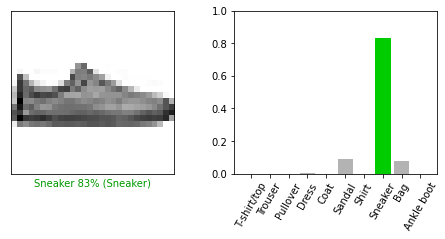

In [50]:
i = 12

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=60)
plt.yticks(0.2*np.arange(6))
plt.show()

<br>

### Problem 2. (OPTIONAL)

<br>

<font style="font-size:18px"><b>This problem is OPTIONAL and does not count neither as a part of regular credit nor extra credit.</b></font>

<br>

In Problem 1, we played around with `fashion_mnist` dataset by loading it from `keras.datasets` submodule:.

`from keras.datasets import mnist`

This keras submodule also contains dataset `mnist`, which consists of digital images of handwritten digits {0,1,...,9}. More over, just like `fashion_mnist`, the dataset `mnist` consists of 60,000 training images and 10,000 test images. The images are 28 x 28 (just like fashion items). 

Load the `mnist` data set

`from keras.datasets import mnist`

`(train_images, train_labels), (test_images, test_labels) = mnist.load_data()`

Play around with these data in the same manner as you did with `fashion_mnist`.